In [1]:
import tensorflow as tf
import pydot
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the data from UCI dataset
#pip install openpyxl
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
url2 = 'data/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(url2)

# shuffule data, sample without replacement
df = df.sample(frac=1).reset_index(drop=True)

# drop redundant columns
df = df.iloc[:, 0:10]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.69,735.0,294.0,220.5,3.5,4,0.40,1,14.42,16.87
1,0.69,735.0,294.0,220.5,3.5,5,0.25,4,12.86,16.13
2,0.86,588.0,294.0,147.0,7.0,4,0.40,5,31.12,36.26
3,0.64,784.0,343.0,220.5,3.5,3,0.10,4,15.19,19.25
4,0.64,784.0,343.0,220.5,3.5,2,0.10,5,15.16,19.24


# Utilities

In [3]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def normalize(x):
    return((x-train_stats['mean'])/train_stats['std'])



def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.legend()
    plt.show()

## Prepare data

In [4]:
train, test = train_test_split(df,test_size=0.2, random_state=1)

# remove y1 and y2 and normalize remaining columns
train_stats = train.describe()
train_stats.pop('Y1') 
train_stats.pop('Y2')
train_stats = train_stats.transpose()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_y = format_output(train)
test_y = format_output(test)

train_x = normalize(train)
test_x = normalize(test)

## Build the model


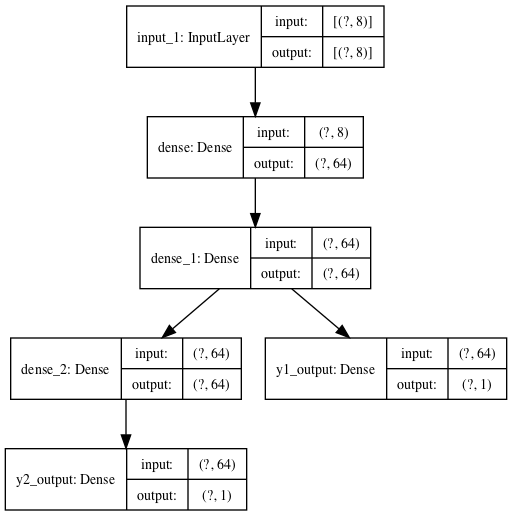

In [5]:
input_layer = Input(shape=(len(train.columns), ))
first_layer = Dense(64, activation=tf.nn.relu)(input_layer)
second_layer = Dense(64, activation=tf.nn.relu)(first_layer)

y1_output = Dense(1, name='y1_output')(second_layer)

third_layer = Dense(64, activation='relu')(second_layer)
y2_output = Dense(1, name='y2_output')(third_layer)

model = Model(inputs = input_layer, outputs = [y1_output, y2_output])

plot_model(model, show_shapes=True, show_layer_names=True)

In [6]:
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(loss={'y1_output': 'mse', 'y2_output': tf.losses.mean_squared_error},
              optimizer= optimizer, metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                                             'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           576         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           4160        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           4160        dense_1[0][0]                    
______________________________________________________________________________________________

In [8]:
train_x.shape

(614, 8)

In [9]:
history = model.fit(train_x, train_y, epochs=500, verbose=1, validation_data = (test_x, test_y))

Train on 614 samples, validate on 154 samples
Epoch 1/500
614/614 [==============================] - 1s 1ms/sample - loss: 646.7871 - y1_output_loss: 325.7607 - y2_output_loss: 301.2914 - y1_output_root_mean_squared_error: 18.3478 - y2_output_root_mean_squared_error: 17.6110 - val_loss: 127.4306 - val_y1_output_loss: 32.7601 - val_y2_output_loss: 94.5995 - val_y1_output_root_mean_squared_error: 5.7407 - val_y2_output_root_mean_squared_error: 9.7198
Epoch 2/500
614/614 [==============================] - 0s 103us/sample - loss: 55.6152 - y1_output_loss: 23.1380 - y2_output_loss: 32.8398 - y1_output_root_mean_squared_error: 4.7948 - y2_output_root_mean_squared_error: 5.7118 - val_loss: 50.5747 - val_y1_output_loss: 19.8885 - val_y2_output_loss: 30.5655 - val_y1_output_root_mean_squared_error: 4.4657 - val_y2_output_root_mean_squared_error: 5.5346
Epoch 3/500
614/614 [==============================] - 0s 97us/sample - loss: 35.6496 - y1_output_loss: 15.3295 - y2_output_loss: 20.4101 - y1_o

Epoch 21/500
614/614 [==============================] - 0s 98us/sample - loss: 19.7276 - y1_output_loss: 7.8063 - y2_output_loss: 12.1586 - y1_output_root_mean_squared_error: 2.7855 - y2_output_root_mean_squared_error: 3.4596 - val_loss: 24.7335 - val_y1_output_loss: 10.1446 - val_y2_output_loss: 14.6327 - val_y1_output_root_mean_squared_error: 3.1730 - val_y2_output_root_mean_squared_error: 3.8295
Epoch 22/500
614/614 [==============================] - 0s 104us/sample - loss: 17.8957 - y1_output_loss: 7.5963 - y2_output_loss: 9.9643 - y1_output_root_mean_squared_error: 2.7586 - y2_output_root_mean_squared_error: 3.2072 - val_loss: 31.9496 - val_y1_output_loss: 11.3378 - val_y2_output_loss: 20.4796 - val_y1_output_root_mean_squared_error: 3.3812 - val_y2_output_root_mean_squared_error: 4.5296
Epoch 23/500
614/614 [==============================] - 0s 92us/sample - loss: 17.5496 - y1_output_loss: 7.2916 - y2_output_loss: 10.3362 - y1_output_root_mean_squared_error: 2.7169 - y2_output_ro

614/614 [==============================] - 0s 86us/sample - loss: 16.1470 - y1_output_loss: 6.8040 - y2_output_loss: 9.3551 - y1_output_root_mean_squared_error: 2.5810 - y2_output_root_mean_squared_error: 3.0798 - val_loss: 18.5530 - val_y1_output_loss: 7.9841 - val_y2_output_loss: 10.6085 - val_y1_output_root_mean_squared_error: 2.8224 - val_y2_output_root_mean_squared_error: 3.2538
Epoch 42/500
614/614 [==============================] - 0s 86us/sample - loss: 16.1949 - y1_output_loss: 7.1655 - y2_output_loss: 9.8094 - y1_output_root_mean_squared_error: 2.5779 - y2_output_root_mean_squared_error: 3.0902 - val_loss: 26.5538 - val_y1_output_loss: 11.2926 - val_y2_output_loss: 14.8347 - val_y1_output_root_mean_squared_error: 3.3730 - val_y2_output_root_mean_squared_error: 3.8957
Epoch 43/500
614/614 [==============================] - 0s 86us/sample - loss: 17.7445 - y1_output_loss: 7.1020 - y2_output_loss: 10.9714 - y1_output_root_mean_squared_error: 2.6670 - y2_output_root_mean_squared_

614/614 [==============================] - 0s 88us/sample - loss: 13.5545 - y1_output_loss: 5.6794 - y2_output_loss: 7.8071 - y1_output_root_mean_squared_error: 2.3813 - y2_output_root_mean_squared_error: 2.8078 - val_loss: 14.7581 - val_y1_output_loss: 6.7713 - val_y2_output_loss: 7.8579 - val_y1_output_root_mean_squared_error: 2.6066 - val_y2_output_root_mean_squared_error: 2.8220
Epoch 62/500
614/614 [==============================] - 0s 87us/sample - loss: 14.4630 - y1_output_loss: 5.8787 - y2_output_loss: 8.8365 - y1_output_root_mean_squared_error: 2.4219 - y2_output_root_mean_squared_error: 2.9321 - val_loss: 73.5278 - val_y1_output_loss: 13.7327 - val_y2_output_loss: 58.8551 - val_y1_output_root_mean_squared_error: 3.7444 - val_y2_output_root_mean_squared_error: 7.7141
Epoch 63/500
614/614 [==============================] - 0s 87us/sample - loss: 16.5173 - y1_output_loss: 5.8964 - y2_output_loss: 10.3451 - y1_output_root_mean_squared_error: 2.4402 - y2_output_root_mean_squared_e

614/614 [==============================] - 0s 84us/sample - loss: 11.9687 - y1_output_loss: 4.7012 - y2_output_loss: 6.9894 - y1_output_root_mean_squared_error: 2.1994 - y2_output_root_mean_squared_error: 2.6704 - val_loss: 16.3377 - val_y1_output_loss: 6.6035 - val_y2_output_loss: 9.6984 - val_y1_output_root_mean_squared_error: 2.5625 - val_y2_output_root_mean_squared_error: 3.1259
Epoch 82/500
614/614 [==============================] - 0s 83us/sample - loss: 11.3800 - y1_output_loss: 4.6563 - y2_output_loss: 6.9394 - y1_output_root_mean_squared_error: 2.1492 - y2_output_root_mean_squared_error: 2.6002 - val_loss: 15.3886 - val_y1_output_loss: 6.0086 - val_y2_output_loss: 9.2953 - val_y1_output_root_mean_squared_error: 2.4667 - val_y2_output_root_mean_squared_error: 3.0503
Epoch 83/500
614/614 [==============================] - 0s 83us/sample - loss: 10.9500 - y1_output_loss: 4.6165 - y2_output_loss: 6.2268 - y1_output_root_mean_squared_error: 2.1281 - y2_output_root_mean_squared_erro

Epoch 102/500
614/614 [==============================] - 0s 94us/sample - loss: 8.8580 - y1_output_loss: 3.8384 - y2_output_loss: 5.2767 - y1_output_root_mean_squared_error: 1.8950 - y2_output_root_mean_squared_error: 2.2950 - val_loss: 12.7518 - val_y1_output_loss: 5.4964 - val_y2_output_loss: 7.1658 - val_y1_output_root_mean_squared_error: 2.3464 - val_y2_output_root_mean_squared_error: 2.6919
Epoch 103/500
614/614 [==============================] - 0s 95us/sample - loss: 8.9702 - y1_output_loss: 3.6683 - y2_output_loss: 5.4410 - y1_output_root_mean_squared_error: 1.8764 - y2_output_root_mean_squared_error: 2.3344 - val_loss: 14.0898 - val_y1_output_loss: 6.6587 - val_y2_output_loss: 7.3919 - val_y1_output_root_mean_squared_error: 2.5832 - val_y2_output_root_mean_squared_error: 2.7234
Epoch 104/500
614/614 [==============================] - 0s 92us/sample - loss: 8.0860 - y1_output_loss: 3.5091 - y2_output_loss: 4.9025 - y1_output_root_mean_squared_error: 1.8307 - y2_output_root_mean

614/614 [==============================] - 0s 105us/sample - loss: 6.5887 - y1_output_loss: 2.5423 - y2_output_loss: 3.8280 - y1_output_root_mean_squared_error: 1.6240 - y2_output_root_mean_squared_error: 1.9877 - val_loss: 7.9214 - val_y1_output_loss: 3.2826 - val_y2_output_loss: 4.6571 - val_y1_output_root_mean_squared_error: 1.8153 - val_y2_output_root_mean_squared_error: 2.1508
Epoch 123/500
614/614 [==============================] - 0s 104us/sample - loss: 6.4144 - y1_output_loss: 2.5072 - y2_output_loss: 3.6919 - y1_output_root_mean_squared_error: 1.6136 - y2_output_root_mean_squared_error: 1.9521 - val_loss: 9.7351 - val_y1_output_loss: 3.8284 - val_y2_output_loss: 6.0548 - val_y1_output_root_mean_squared_error: 1.9451 - val_y2_output_root_mean_squared_error: 2.4396
Epoch 124/500
614/614 [==============================] - 0s 101us/sample - loss: 7.1988 - y1_output_loss: 2.6917 - y2_output_loss: 4.2943 - y1_output_root_mean_squared_error: 1.6557 - y2_output_root_mean_squared_erro

Epoch 143/500
614/614 [==============================] - 0s 123us/sample - loss: 6.3486 - y1_output_loss: 2.3460 - y2_output_loss: 3.7813 - y1_output_root_mean_squared_error: 1.5571 - y2_output_root_mean_squared_error: 1.9809 - val_loss: 6.7445 - val_y1_output_loss: 2.7572 - val_y2_output_loss: 3.9776 - val_y1_output_root_mean_squared_error: 1.6665 - val_y2_output_root_mean_squared_error: 1.9918
Epoch 144/500
614/614 [==============================] - 0s 121us/sample - loss: 5.3943 - y1_output_loss: 2.0435 - y2_output_loss: 3.2057 - y1_output_root_mean_squared_error: 1.4365 - y2_output_root_mean_squared_error: 1.8250 - val_loss: 8.4446 - val_y1_output_loss: 2.8855 - val_y2_output_loss: 5.5864 - val_y1_output_root_mean_squared_error: 1.6973 - val_y2_output_root_mean_squared_error: 2.3588
Epoch 145/500
614/614 [==============================] - 0s 118us/sample - loss: 6.1688 - y1_output_loss: 2.4051 - y2_output_loss: 4.1803 - y1_output_root_mean_squared_error: 1.5271 - y2_output_root_mea

614/614 [==============================] - 0s 104us/sample - loss: 5.4920 - y1_output_loss: 1.9559 - y2_output_loss: 3.3471 - y1_output_root_mean_squared_error: 1.4198 - y2_output_root_mean_squared_error: 1.8644 - val_loss: 7.4171 - val_y1_output_loss: 2.3907 - val_y2_output_loss: 5.0604 - val_y1_output_root_mean_squared_error: 1.5413 - val_y2_output_root_mean_squared_error: 2.2453
Epoch 164/500
614/614 [==============================] - 0s 99us/sample - loss: 5.0855 - y1_output_loss: 2.0310 - y2_output_loss: 3.2179 - y1_output_root_mean_squared_error: 1.3807 - y2_output_root_mean_squared_error: 1.7830 - val_loss: 6.1058 - val_y1_output_loss: 2.3067 - val_y2_output_loss: 3.7532 - val_y1_output_root_mean_squared_error: 1.5237 - val_y2_output_root_mean_squared_error: 1.9453
Epoch 165/500
614/614 [==============================] - 0s 100us/sample - loss: 5.0014 - y1_output_loss: 1.7221 - y2_output_loss: 3.2243 - y1_output_root_mean_squared_error: 1.3029 - y2_output_root_mean_squared_error

Epoch 184/500
614/614 [==============================] - 0s 101us/sample - loss: 4.7286 - y1_output_loss: 1.6393 - y2_output_loss: 3.0975 - y1_output_root_mean_squared_error: 1.2786 - y2_output_root_mean_squared_error: 1.7589 - val_loss: 7.3841 - val_y1_output_loss: 2.3306 - val_y2_output_loss: 5.0683 - val_y1_output_root_mean_squared_error: 1.5300 - val_y2_output_root_mean_squared_error: 2.2457
Epoch 185/500
614/614 [==============================] - 0s 120us/sample - loss: 5.1610 - y1_output_loss: 1.6254 - y2_output_loss: 3.7258 - y1_output_root_mean_squared_error: 1.2662 - y2_output_root_mean_squared_error: 1.8862 - val_loss: 13.1560 - val_y1_output_loss: 4.0699 - val_y2_output_loss: 9.0229 - val_y1_output_root_mean_squared_error: 2.0141 - val_y2_output_root_mean_squared_error: 3.0166
Epoch 186/500
614/614 [==============================] - 0s 113us/sample - loss: 5.4533 - y1_output_loss: 1.7864 - y2_output_loss: 3.5162 - y1_output_root_mean_squared_error: 1.3485 - y2_output_root_me

614/614 [==============================] - 0s 106us/sample - loss: 4.7121 - y1_output_loss: 1.5094 - y2_output_loss: 3.1670 - y1_output_root_mean_squared_error: 1.2236 - y2_output_root_mean_squared_error: 1.7930 - val_loss: 9.2485 - val_y1_output_loss: 3.6670 - val_y2_output_loss: 5.6797 - val_y1_output_root_mean_squared_error: 1.9027 - val_y2_output_root_mean_squared_error: 2.3724
Epoch 205/500
614/614 [==============================] - 0s 105us/sample - loss: 4.9003 - y1_output_loss: 1.4349 - y2_output_loss: 3.2868 - y1_output_root_mean_squared_error: 1.2224 - y2_output_root_mean_squared_error: 1.8455 - val_loss: 7.5070 - val_y1_output_loss: 2.4646 - val_y2_output_loss: 5.1079 - val_y1_output_root_mean_squared_error: 1.5656 - val_y2_output_root_mean_squared_error: 2.2485
Epoch 206/500
614/614 [==============================] - 0s 117us/sample - loss: 6.2695 - y1_output_loss: 1.8933 - y2_output_loss: 4.2721 - y1_output_root_mean_squared_error: 1.3586 - y2_output_root_mean_squared_erro

Epoch 225/500
614/614 [==============================] - 0s 95us/sample - loss: 4.0264 - y1_output_loss: 1.1048 - y2_output_loss: 2.9288 - y1_output_root_mean_squared_error: 1.0419 - y2_output_root_mean_squared_error: 1.7149 - val_loss: 8.8163 - val_y1_output_loss: 2.9074 - val_y2_output_loss: 6.0472 - val_y1_output_root_mean_squared_error: 1.7006 - val_y2_output_root_mean_squared_error: 2.4340
Epoch 226/500
614/614 [==============================] - 0s 96us/sample - loss: 5.3162 - y1_output_loss: 1.6727 - y2_output_loss: 3.4801 - y1_output_root_mean_squared_error: 1.3147 - y2_output_root_mean_squared_error: 1.8941 - val_loss: 3.6269 - val_y1_output_loss: 1.3847 - val_y2_output_loss: 2.1982 - val_y1_output_root_mean_squared_error: 1.1846 - val_y2_output_root_mean_squared_error: 1.4912
Epoch 227/500
614/614 [==============================] - 0s 98us/sample - loss: 3.3381 - y1_output_loss: 1.0401 - y2_output_loss: 2.3921 - y1_output_root_mean_squared_error: 0.9890 - y2_output_root_mean_s

Epoch 246/500
614/614 [==============================] - 0s 99us/sample - loss: 3.2759 - y1_output_loss: 0.9077 - y2_output_loss: 2.3173 - y1_output_root_mean_squared_error: 0.9378 - y2_output_root_mean_squared_error: 1.5481 - val_loss: 9.5187 - val_y1_output_loss: 3.1355 - val_y2_output_loss: 6.2466 - val_y1_output_root_mean_squared_error: 1.7822 - val_y2_output_root_mean_squared_error: 2.5184
Epoch 247/500
614/614 [==============================] - 0s 94us/sample - loss: 3.7383 - y1_output_loss: 1.0668 - y2_output_loss: 2.6229 - y1_output_root_mean_squared_error: 1.0364 - y2_output_root_mean_squared_error: 1.6322 - val_loss: 2.9159 - val_y1_output_loss: 0.8980 - val_y2_output_loss: 2.0475 - val_y1_output_root_mean_squared_error: 0.9481 - val_y2_output_root_mean_squared_error: 1.4202
Epoch 248/500
614/614 [==============================] - 0s 92us/sample - loss: 2.2359 - y1_output_loss: 0.6527 - y2_output_loss: 1.5680 - y1_output_root_mean_squared_error: 0.8097 - y2_output_root_mean_s

Epoch 267/500
614/614 [==============================] - 0s 95us/sample - loss: 2.9458 - y1_output_loss: 0.8693 - y2_output_loss: 2.1208 - y1_output_root_mean_squared_error: 0.9225 - y2_output_root_mean_squared_error: 1.4474 - val_loss: 9.9183 - val_y1_output_loss: 2.7942 - val_y2_output_loss: 7.1560 - val_y1_output_root_mean_squared_error: 1.6821 - val_y2_output_root_mean_squared_error: 2.6625
Epoch 268/500
614/614 [==============================] - 0s 100us/sample - loss: 3.8824 - y1_output_loss: 0.8853 - y2_output_loss: 2.8597 - y1_output_root_mean_squared_error: 0.9561 - y2_output_root_mean_squared_error: 1.7229 - val_loss: 2.6670 - val_y1_output_loss: 0.6977 - val_y2_output_loss: 1.9878 - val_y1_output_root_mean_squared_error: 0.8407 - val_y2_output_root_mean_squared_error: 1.4001
Epoch 269/500
614/614 [==============================] - 0s 100us/sample - loss: 2.5046 - y1_output_loss: 0.6589 - y2_output_loss: 1.7534 - y1_output_root_mean_squared_error: 0.8241 - y2_output_root_mean

Epoch 288/500
614/614 [==============================] - 0s 92us/sample - loss: 2.6885 - y1_output_loss: 0.6914 - y2_output_loss: 1.9337 - y1_output_root_mean_squared_error: 0.8273 - y2_output_root_mean_squared_error: 1.4156 - val_loss: 3.3090 - val_y1_output_loss: 0.7946 - val_y2_output_loss: 2.4729 - val_y1_output_root_mean_squared_error: 0.8983 - val_y2_output_root_mean_squared_error: 1.5818
Epoch 289/500
614/614 [==============================] - 0s 92us/sample - loss: 2.0039 - y1_output_loss: 0.5702 - y2_output_loss: 1.4244 - y1_output_root_mean_squared_error: 0.7679 - y2_output_root_mean_squared_error: 1.1892 - val_loss: 2.3465 - val_y1_output_loss: 0.6089 - val_y2_output_loss: 1.7265 - val_y1_output_root_mean_squared_error: 0.7831 - val_y2_output_root_mean_squared_error: 1.3165
Epoch 290/500
614/614 [==============================] - 0s 94us/sample - loss: 1.9299 - y1_output_loss: 0.5157 - y2_output_loss: 1.3732 - y1_output_root_mean_squared_error: 0.7207 - y2_output_root_mean_s

Epoch 309/500
614/614 [==============================] - 0s 91us/sample - loss: 2.1081 - y1_output_loss: 0.5211 - y2_output_loss: 1.5879 - y1_output_root_mean_squared_error: 0.7143 - y2_output_root_mean_squared_error: 1.2641 - val_loss: 3.4682 - val_y1_output_loss: 0.9043 - val_y2_output_loss: 2.5313 - val_y1_output_root_mean_squared_error: 0.9494 - val_y2_output_root_mean_squared_error: 1.6021
Epoch 310/500
614/614 [==============================] - 0s 91us/sample - loss: 1.9923 - y1_output_loss: 0.5595 - y2_output_loss: 1.5015 - y1_output_root_mean_squared_error: 0.7505 - y2_output_root_mean_squared_error: 1.1955 - val_loss: 3.3633 - val_y1_output_loss: 0.6815 - val_y2_output_loss: 2.6607 - val_y1_output_root_mean_squared_error: 0.8280 - val_y2_output_root_mean_squared_error: 1.6364
Epoch 311/500
614/614 [==============================] - 0s 100us/sample - loss: 2.2772 - y1_output_loss: 0.5559 - y2_output_loss: 1.6508 - y1_output_root_mean_squared_error: 0.7493 - y2_output_root_mean_

Epoch 330/500
614/614 [==============================] - 0s 98us/sample - loss: 3.3428 - y1_output_loss: 0.6555 - y2_output_loss: 2.5826 - y1_output_root_mean_squared_error: 0.8234 - y2_output_root_mean_squared_error: 1.6324 - val_loss: 1.7694 - val_y1_output_loss: 0.4149 - val_y2_output_loss: 1.3684 - val_y1_output_root_mean_squared_error: 0.6434 - val_y2_output_root_mean_squared_error: 1.1642
Epoch 331/500
614/614 [==============================] - 0s 94us/sample - loss: 2.5331 - y1_output_loss: 0.5997 - y2_output_loss: 1.8992 - y1_output_root_mean_squared_error: 0.7864 - y2_output_root_mean_squared_error: 1.3837 - val_loss: 3.6750 - val_y1_output_loss: 0.6105 - val_y2_output_loss: 3.0750 - val_y1_output_root_mean_squared_error: 0.7809 - val_y2_output_root_mean_squared_error: 1.7508
Epoch 332/500
614/614 [==============================] - 0s 97us/sample - loss: 2.0341 - y1_output_loss: 0.6327 - y2_output_loss: 1.6632 - y1_output_root_mean_squared_error: 0.7209 - y2_output_root_mean_s

Epoch 351/500
614/614 [==============================] - 0s 105us/sample - loss: 1.5711 - y1_output_loss: 0.4240 - y2_output_loss: 1.2174 - y1_output_root_mean_squared_error: 0.6316 - y2_output_root_mean_squared_error: 1.0827 - val_loss: 4.6274 - val_y1_output_loss: 1.4811 - val_y2_output_loss: 3.0729 - val_y1_output_root_mean_squared_error: 1.2185 - val_y2_output_root_mean_squared_error: 1.7727
Epoch 352/500
614/614 [==============================] - 0s 97us/sample - loss: 2.2440 - y1_output_loss: 0.5201 - y2_output_loss: 1.7224 - y1_output_root_mean_squared_error: 0.7192 - y2_output_root_mean_squared_error: 1.3141 - val_loss: 2.1602 - val_y1_output_loss: 0.5372 - val_y2_output_loss: 1.6181 - val_y1_output_root_mean_squared_error: 0.7276 - val_y2_output_root_mean_squared_error: 1.2770
Epoch 353/500
614/614 [==============================] - 0s 97us/sample - loss: 1.5935 - y1_output_loss: 0.4072 - y2_output_loss: 1.1296 - y1_output_root_mean_squared_error: 0.6505 - y2_output_root_mean_

Epoch 372/500
614/614 [==============================] - 0s 107us/sample - loss: 2.2142 - y1_output_loss: 0.5435 - y2_output_loss: 1.5995 - y1_output_root_mean_squared_error: 0.7438 - y2_output_root_mean_squared_error: 1.2888 - val_loss: 3.0076 - val_y1_output_loss: 1.0376 - val_y2_output_loss: 1.9636 - val_y1_output_root_mean_squared_error: 1.0213 - val_y2_output_root_mean_squared_error: 1.4016
Epoch 373/500
614/614 [==============================] - 0s 105us/sample - loss: 1.9697 - y1_output_loss: 0.4525 - y2_output_loss: 1.4488 - y1_output_root_mean_squared_error: 0.6857 - y2_output_root_mean_squared_error: 1.2245 - val_loss: 1.8389 - val_y1_output_loss: 0.3828 - val_y2_output_loss: 1.4442 - val_y1_output_root_mean_squared_error: 0.6141 - val_y2_output_root_mean_squared_error: 1.2091
Epoch 374/500
614/614 [==============================] - 0s 100us/sample - loss: 1.4518 - y1_output_loss: 0.3188 - y2_output_loss: 1.0965 - y1_output_root_mean_squared_error: 0.5670 - y2_output_root_mea

Epoch 393/500
614/614 [==============================] - 0s 92us/sample - loss: 2.0078 - y1_output_loss: 0.4653 - y2_output_loss: 1.6000 - y1_output_root_mean_squared_error: 0.6748 - y2_output_root_mean_squared_error: 1.2460 - val_loss: 2.9235 - val_y1_output_loss: 0.3151 - val_y2_output_loss: 2.5784 - val_y1_output_root_mean_squared_error: 0.5642 - val_y2_output_root_mean_squared_error: 1.6141
Epoch 394/500
614/614 [==============================] - 0s 99us/sample - loss: 1.2738 - y1_output_loss: 0.3079 - y2_output_loss: 0.9394 - y1_output_root_mean_squared_error: 0.5637 - y2_output_root_mean_squared_error: 0.9778 - val_loss: 1.6109 - val_y1_output_loss: 0.2770 - val_y2_output_loss: 1.3123 - val_y1_output_root_mean_squared_error: 0.5290 - val_y2_output_root_mean_squared_error: 1.1537
Epoch 395/500
614/614 [==============================] - 0s 99us/sample - loss: 2.0753 - y1_output_loss: 0.4445 - y2_output_loss: 1.6209 - y1_output_root_mean_squared_error: 0.6375 - y2_output_root_mean_s

Epoch 414/500
614/614 [==============================] - 0s 86us/sample - loss: 1.6315 - y1_output_loss: 0.3368 - y2_output_loss: 1.2525 - y1_output_root_mean_squared_error: 0.5852 - y2_output_root_mean_squared_error: 1.1353 - val_loss: 1.5593 - val_y1_output_loss: 0.2955 - val_y2_output_loss: 1.2351 - val_y1_output_root_mean_squared_error: 0.5428 - val_y2_output_root_mean_squared_error: 1.1246
Epoch 415/500
614/614 [==============================] - 0s 90us/sample - loss: 1.5378 - y1_output_loss: 0.3339 - y2_output_loss: 1.2592 - y1_output_root_mean_squared_error: 0.5654 - y2_output_root_mean_squared_error: 1.1037 - val_loss: 2.8605 - val_y1_output_loss: 0.5003 - val_y2_output_loss: 2.3545 - val_y1_output_root_mean_squared_error: 0.7035 - val_y2_output_root_mean_squared_error: 1.5380
Epoch 416/500
614/614 [==============================] - 0s 91us/sample - loss: 1.6851 - y1_output_loss: 0.4863 - y2_output_loss: 1.4254 - y1_output_root_mean_squared_error: 0.6261 - y2_output_root_mean_s

Epoch 435/500
614/614 [==============================] - 0s 99us/sample - loss: 1.1211 - y1_output_loss: 0.2489 - y2_output_loss: 0.8889 - y1_output_root_mean_squared_error: 0.5076 - y2_output_root_mean_squared_error: 0.9292 - val_loss: 4.1640 - val_y1_output_loss: 0.7824 - val_y2_output_loss: 3.3683 - val_y1_output_root_mean_squared_error: 0.8831 - val_y2_output_root_mean_squared_error: 1.8396
Epoch 436/500
614/614 [==============================] - 0s 88us/sample - loss: 1.6096 - y1_output_loss: 0.3535 - y2_output_loss: 1.2868 - y1_output_root_mean_squared_error: 0.5964 - y2_output_root_mean_squared_error: 1.1198 - val_loss: 1.9606 - val_y1_output_loss: 0.5355 - val_y2_output_loss: 1.4124 - val_y1_output_root_mean_squared_error: 0.7279 - val_y2_output_root_mean_squared_error: 1.1962
Epoch 437/500
614/614 [==============================] - 0s 95us/sample - loss: 1.6018 - y1_output_loss: 0.3294 - y2_output_loss: 1.2269 - y1_output_root_mean_squared_error: 0.5798 - y2_output_root_mean_s

Epoch 456/500
614/614 [==============================] - 0s 94us/sample - loss: 1.5765 - y1_output_loss: 0.3226 - y2_output_loss: 1.2044 - y1_output_root_mean_squared_error: 0.5786 - y2_output_root_mean_squared_error: 1.1143 - val_loss: 1.8106 - val_y1_output_loss: 0.2711 - val_y2_output_loss: 1.5637 - val_y1_output_root_mean_squared_error: 0.5216 - val_y2_output_root_mean_squared_error: 1.2404
Epoch 457/500
614/614 [==============================] - 0s 91us/sample - loss: 1.3468 - y1_output_loss: 0.2885 - y2_output_loss: 1.1147 - y1_output_root_mean_squared_error: 0.5379 - y2_output_root_mean_squared_error: 1.0283 - val_loss: 2.2418 - val_y1_output_loss: 0.4615 - val_y2_output_loss: 1.7628 - val_y1_output_root_mean_squared_error: 0.6761 - val_y2_output_root_mean_squared_error: 1.3359
Epoch 458/500
614/614 [==============================] - 0s 93us/sample - loss: 1.2445 - y1_output_loss: 0.2845 - y2_output_loss: 0.9326 - y1_output_root_mean_squared_error: 0.5337 - y2_output_root_mean_s

Epoch 477/500
614/614 [==============================] - 0s 93us/sample - loss: 1.2406 - y1_output_loss: 0.2384 - y2_output_loss: 1.0340 - y1_output_root_mean_squared_error: 0.4964 - y2_output_root_mean_squared_error: 0.9971 - val_loss: 1.6693 - val_y1_output_loss: 0.2566 - val_y2_output_loss: 1.4096 - val_y1_output_root_mean_squared_error: 0.5061 - val_y2_output_root_mean_squared_error: 1.1888
Epoch 478/500
614/614 [==============================] - 0s 91us/sample - loss: 1.4715 - y1_output_loss: 0.2853 - y2_output_loss: 1.1588 - y1_output_root_mean_squared_error: 0.5389 - y2_output_root_mean_squared_error: 1.0868 - val_loss: 2.5065 - val_y1_output_loss: 0.3300 - val_y2_output_loss: 2.1337 - val_y1_output_root_mean_squared_error: 0.5751 - val_y2_output_root_mean_squared_error: 1.4750
Epoch 479/500
614/614 [==============================] - 0s 92us/sample - loss: 1.1425 - y1_output_loss: 0.2437 - y2_output_loss: 0.8856 - y1_output_root_mean_squared_error: 0.4946 - y2_output_root_mean_s

Epoch 498/500
614/614 [==============================] - 0s 89us/sample - loss: 1.1247 - y1_output_loss: 0.2387 - y2_output_loss: 0.8747 - y1_output_root_mean_squared_error: 0.4790 - y2_output_root_mean_squared_error: 0.9462 - val_loss: 1.4475 - val_y1_output_loss: 0.2369 - val_y2_output_loss: 1.1762 - val_y1_output_root_mean_squared_error: 0.4904 - val_y2_output_root_mean_squared_error: 1.0986
Epoch 499/500
614/614 [==============================] - 0s 89us/sample - loss: 1.0794 - y1_output_loss: 0.2052 - y2_output_loss: 0.8501 - y1_output_root_mean_squared_error: 0.4553 - y2_output_root_mean_squared_error: 0.9338 - val_loss: 1.5711 - val_y1_output_loss: 0.2536 - val_y2_output_loss: 1.2896 - val_y1_output_root_mean_squared_error: 0.5081 - val_y2_output_root_mean_squared_error: 1.1459
Epoch 500/500
614/614 [==============================] - 0s 88us/sample - loss: 1.0760 - y1_output_loss: 0.2256 - y2_output_loss: 0.8612 - y1_output_root_mean_squared_error: 0.4745 - y2_output_root_mean_s

## Metrics

In [10]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=test_x, y=test_y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))


154/154 [==============================] - 0s 75us/sample - loss: 3.2100 - y1_output_loss: 0.4455 - y2_output_loss: 2.7439 - y1_output_root_mean_squared_error: 0.6653 - y2_output_root_mean_squared_error: 1.6635
Loss = 3.2099518466305423, Y1_loss = 0.4454783499240875, Y1_mse = 0.6653265357017517, Y2_loss = 2.743913173675537, Y2_mse = 1.6635180711746216


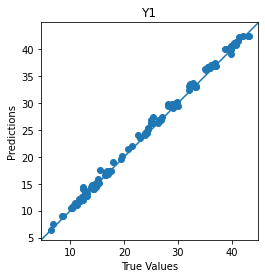

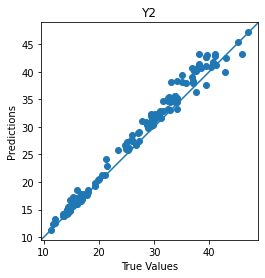

In [11]:
y_pred = model.predict(test_x)

plot_diff(test_y[0], y_pred[0], title='Y1')
plot_diff(test_y[1], y_pred[1], title='Y2')

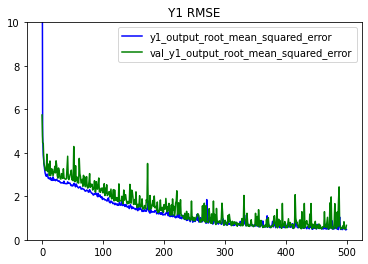

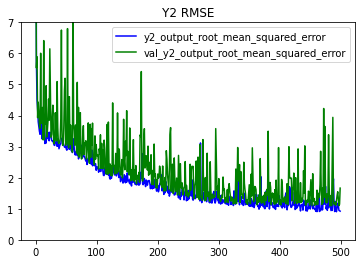

In [12]:
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=10)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)